# 梯度下降法

无约束优化问题时，梯度下降（Gradient Descent）是最常采用的方法之一，另一种常用的方法是最小二乘法。在最小二乘法中，当输入变量$x$的维度高于样本数量时，会导致矩阵不可逆，因此最小二乘法会失效，此时梯度下降法的重要性便凸显出来。

# 1. 梯度
  在微积分里面，对多元函数的参数求$\partial$偏导数，把求得的各个参数的偏导数以向量的形式写出来，就是梯度。比如函数$f(x,y)$, 分别对$x,y$求偏导数，求得的梯度向量就是$(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$,简称$\text{grad} f(x,y)$或者$\nabla f(x,y)$，如果是3个参数的向量梯度，就是$(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z})$,以此类推。

  这个梯度向量的意义从几何意义上讲，就是函数变化增加最快的地方。具体来说，对于函数$f(x,y)$,在点$(x_0,y_0)$，沿着梯度向量的方向就是$(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial y_0})$的方向是$f(x,y)$增加最快的地方。或者说，沿着梯度向量的方向，更加容易找到函数的最大值。反过来说，沿着梯度向量相反的方向，也就是 $-(\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial y_0})$的方向，梯度减少最快，也就是更加容易找到函数的最小值。
  
在机器学习算法中，在最小化损失函数时，可以通过梯度下降法来一步步的迭代求解，得到最小化的损失函数，和模型参数值。反过来，如果我们需要求解损失函数的最大值，这时就需要用梯度上升/下降法来迭代了。

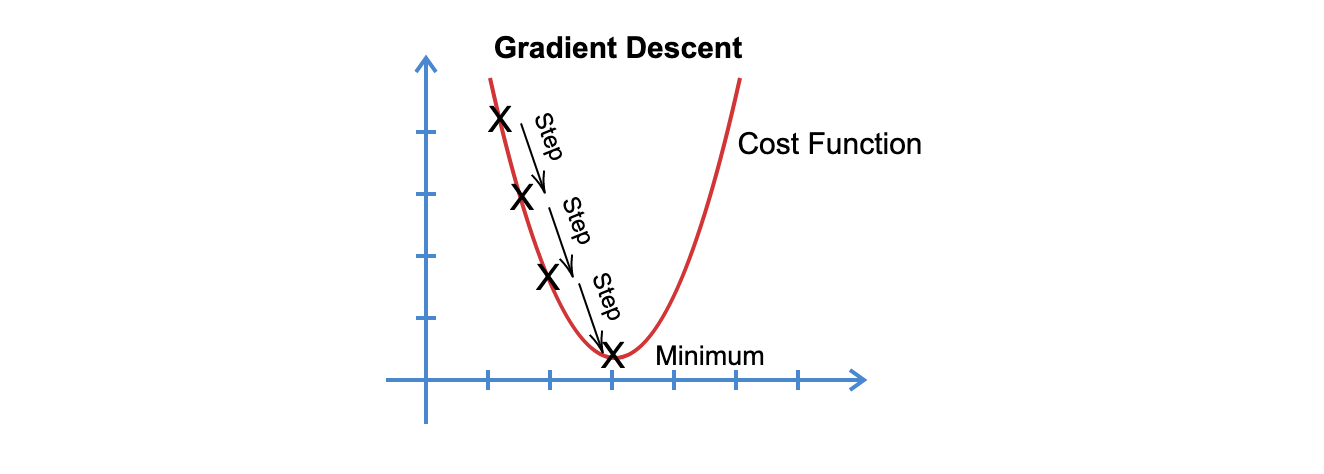

# 2. 梯度下降法的场景解释

假设这样一个场景：一个人被困在山上，需要从山上下来(i.e. 找到山的最低点，也就是山谷)。但此时山上的浓雾很大，导致可视度很低。因此，下山的路径就无法确定，他必须利用自己周围的信息去找到下山的路径。这个时候，他就可以利用梯度下降算法来帮助自己下山。具体来说就是，以他当前的所处的位置为基准，寻找这个位置最陡峭的地方，然后朝着山的高度下降的地方走，然后每走一段距离，都反复采用同一个方法，最后就能成功的抵达山谷。

我们同时可以假设这座山最陡峭的地方是无法通过肉眼立马观察出来的，而是需要一个复杂的工具来测量，同时，这个人此时正好拥有测量出最陡峭方向的能力。所以，此人每走一段距离，都需要一段时间来测量所在位置最陡峭的方向，这是比较耗时的。那么为了在太阳下山之前到达山底，就要尽可能的减少测量方向的次数。这是一个两难的选择，如果测量的频繁，可以保证下山的方向是绝对正确的，但又非常耗时，如果测量的过少，又有偏离轨道的风险。所以需要找到一个合适的测量方向的频率，来确保下山的方向不错误，同时又不至于耗时太多！


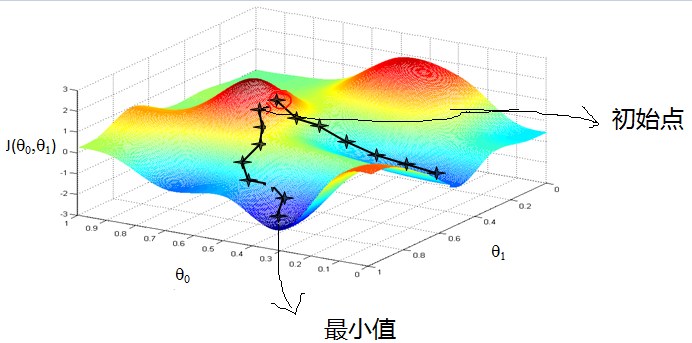

# 3. 梯度下降法的相关概念


#### （1）步长（Learning rate）：
步长决定了在梯度下降迭代的过程中，每一步沿梯度负方向前进的长度。用上面下山的例子，步长就是在当前这一步所在位置沿着最陡峭最易下山的位置走的那一步的长度。

#### （2）特征（feature）
指的是样本中输入部分，例如特征$x$可能是多维的$(x^{(1)},x^{(2)}\cdots,x^{(n)})$

#### （3）假设函数（hypothesis function）
在机器学习中，为了拟合输入样本，而使用的假设函数，记为$h_{\theta}(x)$,对于n个特征的样本为：
\begin{equation}
h_{\theta}(x) = \theta_0 + \theta_1 x^{(1)} + \theta_2 x^{(2)} + \cdots + \theta_n x^{(n)}
\end{equation}

#### （4）损失函数（loss function）
为了评估模型拟合的好坏，通常用损失函数（误差能量函数）来度量拟合的程度。损失函数极小化，意味着拟合程度最好，对应的模型参数即为最优参数。在线性回归中，损失函数通常为样本输出和假设函数的误差平方和。例如对于含有$m$个样本的损失函数为：
\begin{equation}
J(\Theta)=J(\theta_0,\theta_1,\cdots,\theta_n) = \sum_{i=1}^{m}(h_{\theta}(x_i)-y_i)^2
\end{equation}

#### （5）更新过程 (updating process)

\begin{equation}
\Theta_{\text{new}} = \Theta_{\text{old}} - \alpha\cdot\nabla J(\Theta)
\end{equation}

# 4. 梯度下降的详细流程

- 初始化参数。包括$\theta_0,\theta_1,\cdots,\theta_n$以及步长$\alpha$

- 计算当前位置的损失函数的梯度为
\begin{equation}
\frac{\partial}{\partial \theta} J(\theta_0,\theta_1,\cdots,\theta_n)
\end{equation}

- 用步长乘以损失函数的梯度，得到当前位置下降的距离，即对应于前面登山例子中的某一步
\begin{equation}
\alpha\cdot\frac{\partial}{\partial \theta} J(\theta_0,\theta_1,\cdots,\theta_n)
\end{equation}

- 更新参数$\theta_0,\theta_1,\cdots,\theta_n$，具体更新公式为
\begin{equation}
\theta = \theta - \alpha\cdot\frac{\partial}{\partial \theta} J(\theta_0,\theta_1,\cdots,\theta_n)
\end{equation}

# 5. 梯度下降法的矩阵方式描述

在矩阵描述中，$h_{\theta}(x)=X\Theta$，损失函数为$J(\Theta)=\frac{1}{2}(X\Theta-Y)^T(X\Theta-Y)$

- 初始化参数。包括$\theta_0,\theta_1,\cdots,\theta_n$以及步长$\alpha$

- 计算当前位置的损失函数的梯度为
\begin{equation}
\frac{\partial}{\partial \theta} J(\Theta) = X^T(X\Theta-Y)
\end{equation}

- 用步长乘以损失函数的梯度，得到当前位置下降的距离，即对应于前面登山例子中的某一步
\begin{equation}
\alpha\cdot\frac{\partial}{\partial \theta} J(\Theta)
\end{equation}

- 更新参数$\theta_0,\theta_1,\cdots,\theta_n$，具体更新公式为
\begin{equation}
\begin{aligned}
\Theta & = \Theta - \alpha\cdot\frac{\partial}{\partial \theta} J(\Theta)\\
~ & = \Theta - \alpha\cdot X^T(X\Theta-Y)
\end{aligned}
\end{equation}

# 6. 梯度下降法的调优

- 算法的步长选择。

实际上取值取决于数据样本，可以多取一些值，从大到小，分别运行算法，看看迭代效果，如果损失函数在变小，说明取值有效，否则要增大步长。步长太大，会导致迭代过快，甚至有可能错过最优解。步长太小，迭代速度太慢，很长时间算法都不能结束。所以算法的步长需要多次运行后才能得到一个较为优的值。

- 算法参数的初始值选择。

初始值不同，获得的最小值也有可能不同，因此梯度下降求得的只是局部最小值；当然如果损失函数是凸函数则一定是最优解。由于有局部最优解的风险，需要多次用不同初始值运行算法，关键损失函数的最小值，选择损失函数最小化的初值。

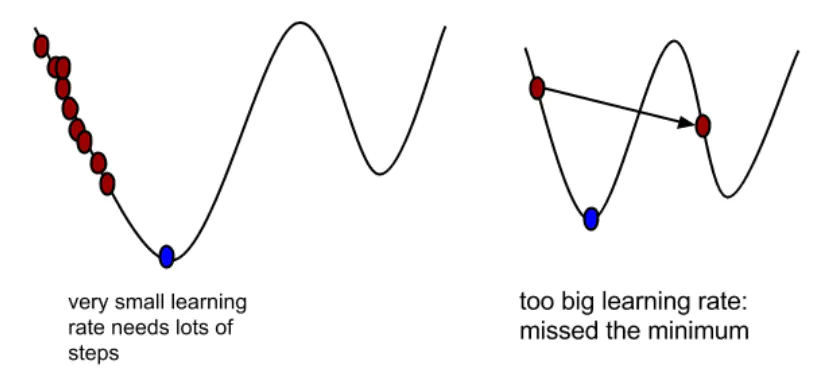

下述代码是用于求解func函数的梯度下降法示例

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(func, gradient, start, learn_rate, n_iter=50, tolerance=1e-06,length = 10):
    
    # 绘制基线
    x =  np.linspace(-length, length, 100) 
    y = func(x)
    plt.plot(x,y)
    
    vector = start
    
    # 记录点
    x_all = [vector] 
    y_all = [func(vector)]
    
    for _ in range(n_iter):
        
        # 梯度下降法核心
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff  
        
        # 绘图用
        x_all.append(vector)
        y_all.append(func(vector))
    
    plt.plot(x_all, y_all, color='r')
    plt.scatter(x_all, y_all, color = 'r', marker='*', s=100, linewidth=1) 
    
    return vector

此处我们利用梯度下降法寻找$J(\theta) = \theta^2$的最小值，此时梯度函数为$\nabla J(\theta) = 2\theta$,更新函数为
\begin{equation}
\theta_{\text{new}} = \theta_{\text{old}} - \alpha\cdot2\theta
\end{equation}

2.210739197207331e-06

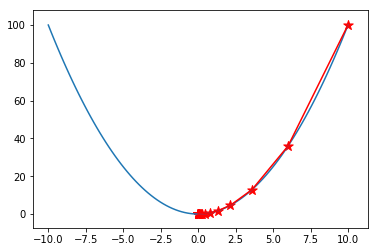

In [2]:
gradient_descent(func=lambda x: x**2, gradient=lambda x: 2 * x, start=10.0, learn_rate=0.2)

观察以上结果发现，使用梯度下降法所求$J(\theta)=\theta^2$的最小值接近于0但是不等于零。
- 其原因是：梯度下降法属于迭代优化方法，每次迭代所用的是上一步参数所在位置的梯度乘以步长，这个值总是不能恰好使得参数落在最优位置，因此总是会逐渐接近最优点但是无法到达最优点。但是，通过更多次数的迭代可以逐渐将误差控制在指定精度内，从而可以满足实际需要。
- 此外，在进行参数迭代时，通过改变学习率（步长）可以修改参数的收敛行为，过大或者过小的步长通常会对收敛过程带来负面影响。

6.050060671375367

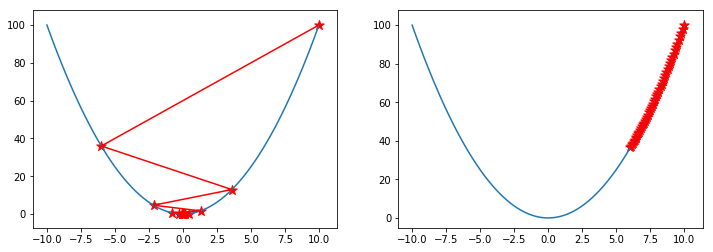

In [3]:
plt.figure(figsize=[12,4])
plt.subplot(121)
gradient_descent(func=lambda x: x**2, gradient=lambda x: 2 * x, start=10.0, learn_rate=0.8)
plt.subplot(122)
gradient_descent(func=lambda x: x**2, gradient=lambda x: 2 * x, start=10.0, learn_rate=0.005)

1.7139398323504043

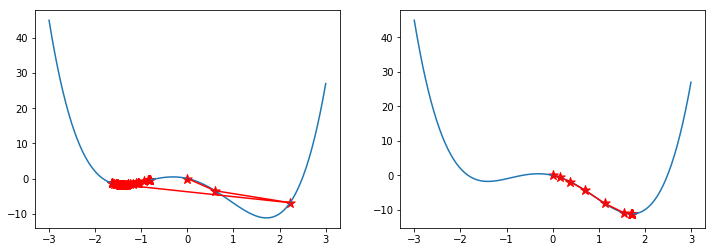

In [4]:
plt.figure(figsize=[12,4])

plt.subplot(121)
gradient_descent(
    func=lambda x: x**4-5*x**2-3*x, 
    gradient=lambda v: 4 * v**3 - 10 * v - 3, 
    start=0,learn_rate=0.2,length=3)

plt.subplot(122)
gradient_descent(
    func=lambda x: x**4-5*x**2-3*x, 
    gradient=lambda v: 4 * v**3 - 10 * v - 3, 
    start=0,learn_rate=0.05,length=3)

初始点同样重要，有的初始值可能会导致参数落入局部最优

1.7139398323504043

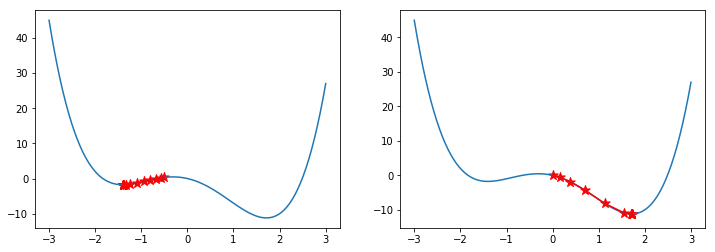

In [5]:
plt.figure(figsize=[12,4])

plt.subplot(121)
gradient_descent(
    func=lambda x: x**4-5*x**2-3*x, 
    gradient=lambda v: 4 * v**3 - 10 * v - 3, 
    start=-0.5,learn_rate=0.05,length=3)

plt.subplot(122)
gradient_descent(
    func=lambda x: x**4-5*x**2-3*x, 
    gradient=lambda v: 4 * v**3 - 10 * v - 3, 
    start=0,learn_rate=0.05,length=3)

# 7. 更常用的梯度下降法（BGD，SGD，MBGD）

- 梯度下降法（GD, gradient descent）：每次迭代过程中，遍历所有样本后进行参数迭代

    - 优点：能获得全局最优解
    - 缺点：计算开销大，不允许在线更新模型

- 随机梯度下降法（SGD, stochastic gradient descent）：每次迭代过程中，多次随机选取一个样本进行迭代

    - 优点：计算快，允许在线更新参数
    - 缺点：容易陷入局部最优，收敛不稳定

- 批量随机梯度下降法（BSGD, batched-SGD）：每次迭代过程中，多次随机选取几个样本进行迭代

    - 优点：理论上可达到全局最优，允许在线更新参数，收敛较稳定
    - 缺点：计算稍复杂


## 本节作业

请参考本节代码，利用梯度下降法求解函数 $f(x) =20\cdot\cos{x}+5\cdot\sin{x} + x^2$ 的极值点，并绘图。

最小值点: x = -2.63782, f(x) = -12.97092


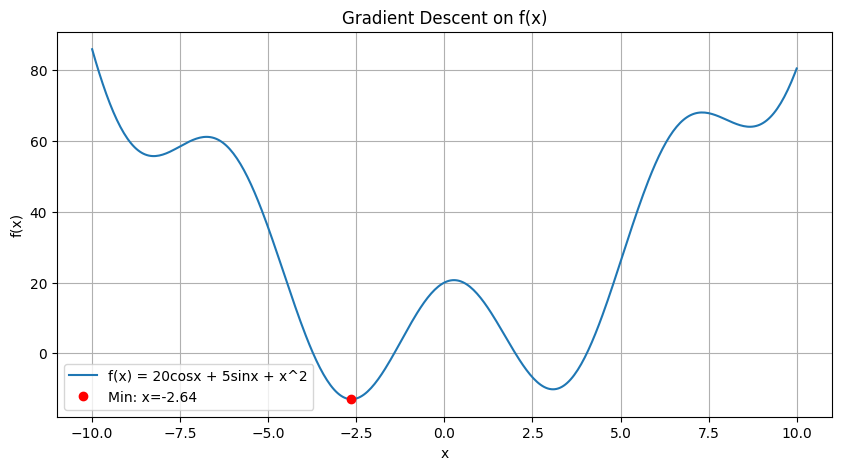

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数及其导数
def f(x):
    return 20 * np.cos(x) + 5 * np.sin(x) + x**2

def grad_f(x):
    return -20 * np.sin(x) + 5 * np.cos(x) + 2 * x

# 梯度下降参数
x = 0.0  # 初始点
learning_rate = 0.01
max_iter = 1000
tolerance = 1e-6

x_vals = [x]
for _ in range(max_iter):
    grad = grad_f(x)
    x_new = x - learning_rate * grad
    if abs(x_new - x) < tolerance:
        break
    x = x_new
    x_vals.append(x)

min_x = x
min_y = f(min_x)

# 打印极小值点
print(f"最小值点: x = {min_x:.5f}, f(x) = {min_y:.5f}")

# 绘图
x_plot = np.linspace(-10, 10, 400)
y_plot = f(x_plot)

plt.figure(figsize=(10, 5))
plt.plot(x_plot, y_plot, label="f(x) = 20cosx + 5sinx + x^2")
plt.plot(min_x, min_y, 'ro', label=f"Min: x={min_x:.2f}")
plt.title("Gradient Descent on f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
